# Lab 3

In [1]:
!unzip ../data_MNIST.zip

Archive:  ../data_MNIST.zip
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importing training data
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.array(np.loadtxt('data/train_labels.txt'), dtype="int")

testing_images = np.loadtxt('data/test_images.txt')
testing_labels = np.array(np.loadtxt('data/test_labels.txt'), dtype="int")

In [57]:
class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def classify_image(self, test_image, num_neighbours=3, metric='l2'):
        if metric == 'l2':
            distances = np.sqrt(
                np.sum((self.train_images - test_image) ** 2, axis = 1)
            )
        elif metric == 'l1':
            distances = np.sum(np.abs(self.train_images - test_image), axis=1)
        else:
            raise Exception("Invalid metric")

        sorted_ind = distances.argsort()
        near = sorted_ind[:num_neighbours]
        near_labels = self.train_labels[near]

        ans = np.bincount(near_labels).argmax()
        return ans

    def __call__(self, test_images, num_neighbours=1, metric='l2'):
        return np.array([
            self.classify_image(i, num_neighbours, metric) for i in test_images
        ])

In [58]:
classifier = KnnClassifier(train_images, train_labels)

In [59]:
def accuracy(ground_truth, predicted):
    return np.mean(ground_truth == predicted)

In [60]:
accuracy(testing_labels, classifier(testing_images))

0.884

In [61]:
def test_classifier(metric, values):
    y = []
    for i in values:
        y.append(
            accuracy(testing_labels, classifier(testing_images, i, metric)))
    return y

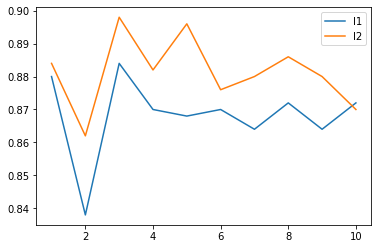

In [64]:
interv = [i for i in range(1, 11)]
l1, l2 = test_classifier('l1', interv), test_classifier('l2', interv)
plt.plot(interv, l1)
plt.plot(interv, l2)
plt.legend(['l1', 'l2'])
plt.show()